# Assignment 1

In [1]:
name = "Andrei Ilin" 
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [2]:
# your code here
def my_function(name, age=25, *args, kw_arg=None, **kwargs):
    """
    This is a simple function demonstrating different types of arguments.
    """
    print(f"Name: {name}")
    print(f"Age: {age}")
    print(f"Positional arguments: {args}")
    print(f"Keyword argument: {kw_arg}")
    print(f"Keyword arguments: {kwargs}")

name = "Andrei Ilin"
age = 30
args = (1, 2, 3)
kw_arg = "keyword"
kwargs = {'a': 1, 'b': 2, 'c': 3}


my_function(name, age, *args, kw_arg, **kwargs)

Name: Andrei Ilin
Age: 30
Positional arguments: (1, 2, 3, 'keyword')
Keyword argument: None
Keyword arguments: {'a': 1, 'b': 2, 'c': 3}


In [3]:
my_function(1)
my_function(1, 20)
my_function(1, 20, 30, 40)
my_function(1, 20, 30, 40, kw_arg=50)
my_function(1, 20, 30, 40, kw_arg=50, extra=60, another=70)

Name: 1
Age: 25
Positional arguments: ()
Keyword argument: None
Keyword arguments: {}
Name: 1
Age: 20
Positional arguments: ()
Keyword argument: None
Keyword arguments: {}
Name: 1
Age: 20
Positional arguments: (30, 40)
Keyword argument: None
Keyword arguments: {}
Name: 1
Age: 20
Positional arguments: (30, 40)
Keyword argument: 50
Keyword arguments: {}
Name: 1
Age: 20
Positional arguments: (30, 40)
Keyword argument: 50
Keyword arguments: {'extra': 60, 'another': 70}


## Exercise 1


In [4]:
def is_prime(n):
    """
    Check if the number is prime or not.
    """
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True
prime = []
n_prime = [] 
N = 30
for n in range(N):
    boolian = is_prime(n)
    if boolian:
        prime.append(n)
    else:
        n_prime.append(n)
    
print(f'list of prime numbers {prime}')
print(f'list of not prime numbers {n_prime}')

list of prime numbers [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
list of not prime numbers [0, 1, 4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28]


## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [5]:
import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in) 
    and print the following data: 
    the name of the analyzed function, 
    the name of all the arguments it takes 
    and their types (positional, keyword, etc.)
    """
    # your code here
    # Get the function name
    func_name = func.__name__
    print(f"Function Name: {func_name}")
    
    # Get the function parameters
    params = inspect.signature(func).parameters
    
    print("Arguments:")
    for param_name, param in params.items():
        param_type = str(param.kind)
        print(f"- {param_name}: {param_type}")


inspect_function(my_function)

Function Name: my_function
Arguments:
- name: POSITIONAL_OR_KEYWORD
- age: POSITIONAL_OR_KEYWORD
- args: VAR_POSITIONAL
- kw_arg: KEYWORD_ONLY
- kwargs: VAR_KEYWORD


## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message. 

In [6]:
from datetime import datetime
from time import sleep
 
# function for time
def my_time_now(msg, *, dt=None):
    dt=datetime.now()
    print(msg, dt)
 


In [7]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2024-12-26 19:24:02.456533


The time is now:  2024-12-26 19:24:03.461327
The time is now:  2024-12-26 19:24:04.462788


## Exercise 4

In [8]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count values of the input_generator.
    """
    # your code here    
    raise NotImplementedError

## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [9]:
# your code here
def pascal_triangle_generator():
    row = [1]
    while True:
        for num in row:
            yield num
        row = [1] + [row[i] + row[i+1] for i in range(len(row) - 1)] + [1]

# Print the first 20 elements from Pascal's triangle sequence
if __name__ == "__main__":
    gen = pascal_triangle_generator()
    for _ in range(21):
        print(next(gen), end=" ")

1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 

## Exercise 6


In [10]:
import pathlib
import os

def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files are sorted alphabetically.
    """
    # Convert path_to_dir to a Path object (for pathlib functionality)
    path = pathlib.Path(path_to_dir)

    if not path.is_dir():
        raise ValueError(f"The provided path '{path_to_dir}' is not a valid directory.")

    # Collect all files in the directory
    files = [file for file in path.iterdir() if file.is_file()]

    # Sort files by size, and alphabetically for files with the same size
    files_sorted = sorted(files, key=lambda f: (f.stat().st_size, f.name))
    return files_sorted

# Example usage:
if __name__ == "__main__":
    path = "."  # Replace with the path of the directory to scan
    try:
        sorted_files = files_sorted_by_size(path)
        for file in sorted_files:
            print(f"{file.name} - {file.stat().st_size} bytes")
    except ValueError as e:
        print(e)

assignment_1.ipynb - 27689 bytes


## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [11]:
import heapq

def merge_sorter(*args):
    # Create a min-heap
    min_heap = []
    
    # Initialize the heap with the first element of each iterable
    iterators = [iter(arg) for arg in args]
    for i, it in enumerate(iterators):
        first_element = next(it, None)
        if first_element is not None:
            heapq.heappush(min_heap, (first_element, i))
    
    while min_heap:
        # Get the smallest element from the heap
        smallest, index = heapq.heappop(min_heap)
        yield smallest
        
        # Get the next element from the same iterator
        next_element = next(iterators[index], None)
        if next_element is not None:
            heapq.heappush(min_heap, (next_element, index))

# Example usage:
if __name__ == "__main__":
    sorted_list1 = [1, 4, 7]
    sorted_list2 = [2, 5, 8]
    sorted_list3 = [0, 3, 6, 9]
    
    merged = merge_sorter(sorted_list1, sorted_list2, sorted_list3)
    print(list(merged))  # Output: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [12]:
import time
import functools

def profiler(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        wrapper.calls += 1
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        wrapper.last_time_taken = end_time - start_time
        return result
    
    wrapper.calls = 0
    wrapper.last_time_taken = 0
    return wrapper

@profiler
def ackermann(n, m):
    if n == 0:
        return m + 1
    elif m == 0:
        return ackermann(n - 1, 1)
    else:
        return ackermann(n - 1, ackermann(n, m - 1))
    
# Example usage:
if __name__ == "__main__":
    result = ackermann(3, 4)
    print("Ackermann(3, 4) =", result)
    print("Last time taken:", ackermann.last_time_taken)
    print("Number of calls:", ackermann.calls)

Ackermann(3, 4) = 125
Last time taken: 0.06617951393127441
Number of calls: 10307


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [13]:
from itertools import repeat, compress, groupby

def ilen(iterable):
    """
    Return the number of items in iterable.

    >>> ilen(x for x in range(1000000) if x % 3 == 0)
    333334
    """
    # using zip() to wrap the input with 1-tuples which compress() reads as true values.
    return sum(compress(repeat(1), zip(iterable)))

def rle_encode(iterable, *, length_first=True):
    """
 >>> "".join(rle_encode("AAAABBBCCDAA"))
 '4A3B2C1D2A'
 >>> "".join(rle_encode("AAAABBBCCDAA", length_first=False))
 'A4B3C2D1A2'
 """
    return (
        f"{ilen(g)}{k}" if length_first else f"{k}{ilen(g)}" # ilen(g): length of iterable g
        for k, g in groupby(iterable)
    )

In [14]:
encoded_with_length_first = "".join(rle_encode("AAAABBBCCDAA"))
encoded_without_length_first = "".join(rle_encode("AAAABBBCCDAA", length_first=False))

print(f"Encoded (length first): {encoded_with_length_first}")
print(f"Encoded (length last): {encoded_without_length_first}")

Encoded (length first): 4A3B2C1D2A
Encoded (length last): A4B3C2D1A2


## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

In [15]:
def fibonacci(n):
    if n == 0 or n == 1:
        return n 
    return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
# pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [26]:
import networkx as nx
import matplotlib.pyplot as plt

def visualizer(func):
    def wrapper(n):
        G = nx.DiGraph()
        
        def recursive_draw(n, parent=None):
            node_name = f"{func.__name__}({n})"
            G.add_node(node_name)
            if parent is not None:
                G.add_edge(parent, node_name)
            
            if n == 0 or n == 1:
                return
            
            recursive_draw(n-1, node_name)
            recursive_draw(n-2, node_name)
        
        recursive_draw(n)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, arrows=True)
        plt.title(f"Recursive Calls for {func.__name__}({n})")
        plt.show()
        
        return func(n)
    
    return wrapper

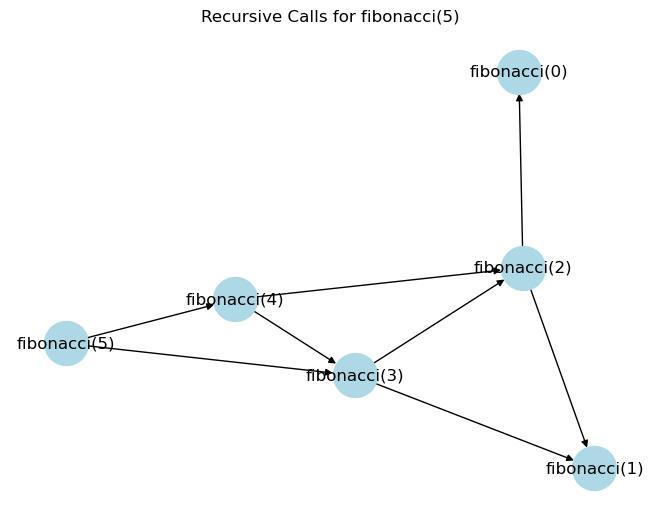

Fibonacci(5) = 5


In [27]:
# Apply the visualizer decorator to the fibonacci function
visualized_fibonacci = visualizer(fibonacci)

# Test the visualized Fibonacci function
result = visualized_fibonacci(5)
print(f"Fibonacci(5) = {result}")

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization). 
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

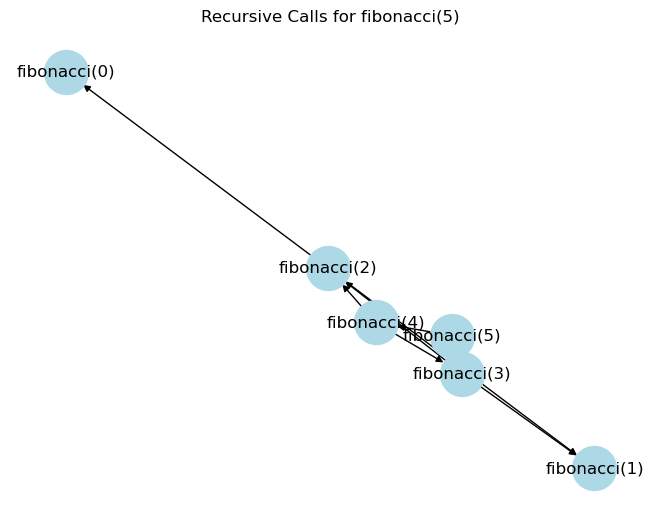

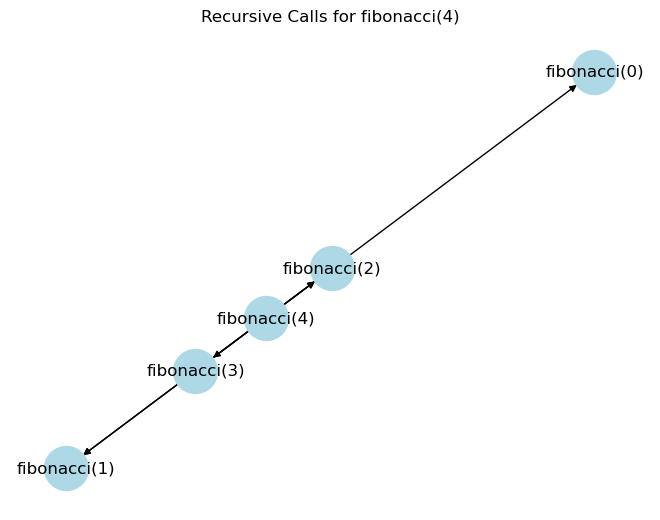

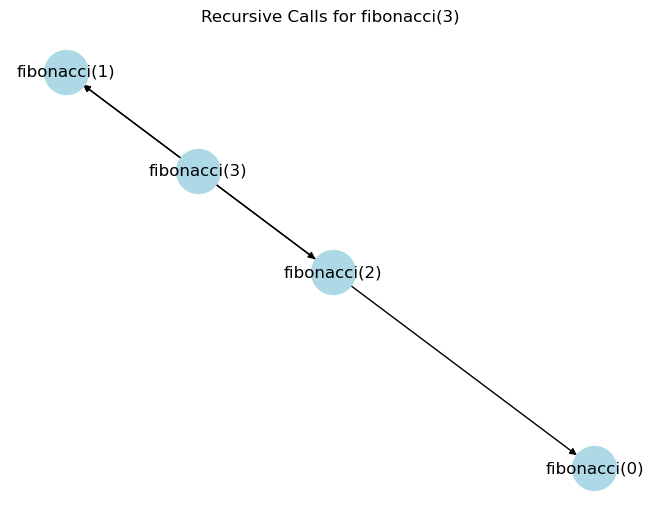

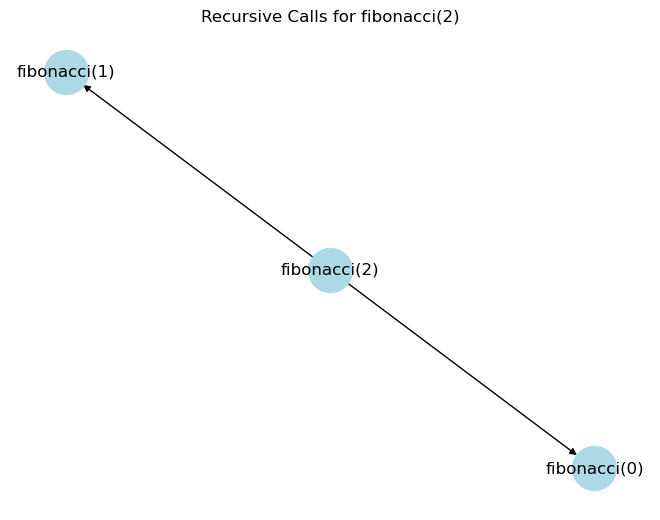

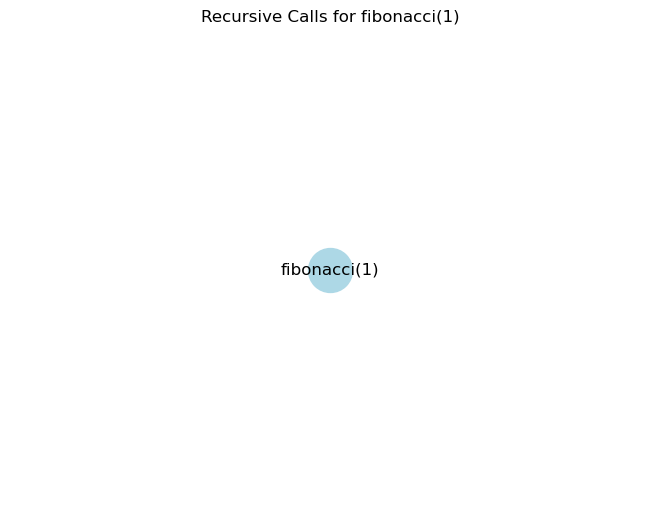

fibonacci(1) executed in 0.135673 seconds


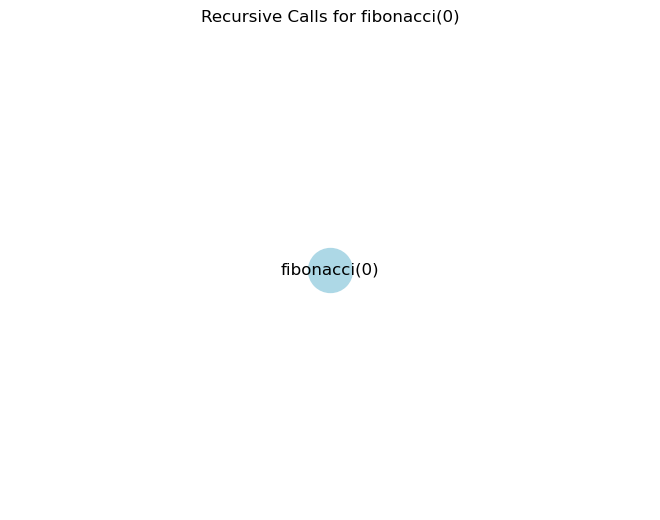

fibonacci(0) executed in 0.134041 seconds
fibonacci(2) executed in 0.448779 seconds
fibonacci(3) executed in 0.647740 seconds
fibonacci(4) executed in 0.866579 seconds
fibonacci(5) executed in 1.117652 seconds
Fibonacci(5) = 5


In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import functools
import time

# Memoizer decorator for caching results
def memoizer(func):
    cache = {}

    @functools.wraps(func)
    def wrapper(n):
        if n not in cache:
            cache[n] = func(n)
        return cache[n]

    return wrapper

# Profiler decorator for measuring execution time
def profiler(func):
    @functools.wraps(func)
    def wrapper(n):
        start_time = time.time()
        result = func(n)
        end_time = time.time()
        print(f"{func.__name__}({n}) executed in {end_time - start_time:.6f} seconds")
        return result
    return wrapper

# Visualizer decorator for visualizing recursion
def visualizer(func):
    @functools.wraps(func)
    def wrapper(n):
        G = nx.DiGraph()

        def recursive_draw(n, parent=None):
            node_name = f"{func.__name__}({n})"
            G.add_node(node_name)
            if parent is not None:
                G.add_edge(parent, node_name)

            if n == 0 or n == 1:
                return

            recursive_draw(n-1, node_name)
            recursive_draw(n-2, node_name)

        recursive_draw(n)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, arrows=True)
        plt.title(f"Recursive Calls for {func.__name__}({n})")
        plt.show()

        return func(n)

    return wrapper

# Apply decorators to the fibonacci function
@memoizer
@profiler
@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

# Test the decorated Fibonacci function
result = fibonacci(5)
print(f"Fibonacci(5) = {result}")

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

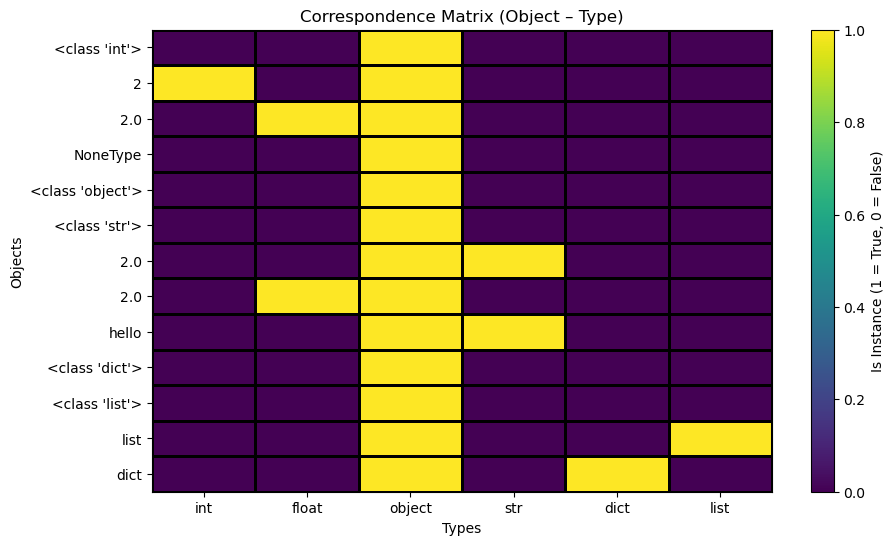

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objects and types
list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

# Create a boolean matrix to store the results of isinstance checks
correspondence_matrix = np.zeros((len(list_of_objects), len(list_of_types)), dtype=int)

# Populate the correspondence matrix
for i, obj in enumerate(list_of_objects):
    for j, typ in enumerate(list_of_types):
        correspondence_matrix[i, j] = isinstance(obj, typ)

# Visualize the correspondence matrix
plt.figure(figsize=(10, 6))
plt.pcolormesh(correspondence_matrix, cmap='viridis', edgecolors='k', linewidth=2)
plt.colorbar(label='Is Instance (1 = True, 0 = False)')

# Set ticks and labels
plt.xticks(np.arange(len(list_of_types)) + 0.5, [typ.__name__ for typ in list_of_types])
plt.yticks(np.arange(len(list_of_objects)) + 0.5, [str(obj) if isinstance(obj, (int, float, str, type)) else type(obj).__name__ for obj in list_of_objects])
plt.title('Correspondence Matrix (Object – Type)')
plt.xlabel('Types')
plt.ylabel('Objects')
plt.gca().invert_yaxis()  # Invert y-axis to have the first object at the top
plt.show()